In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
# Importing the pre processed data and assigning the target feature
df = pd.read_csv('modifiedDatasets/preprocessed.csv')
predictors = [x for x in df.columns if x != 'label']
target = ['label']

# Splitting the dataset into a training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_test = test[predictors]
y_test = test[target]

In [13]:
# Splitting the training set up using k-fold cross validation to reduce stochasticity of model performance 
kf_CV = KFold(n_splits=10, shuffle=True, random_state=42)
results = []
recall = []
precision = []
f1 = []

# Performing kNN Analysis
for train_idx, validate_idx in kf_CV.split(train):
    X_train, X_val = train[predictors].iloc[train_idx], train[predictors].iloc[validate_idx]
    y_train, y_val = train[target].iloc[train_idx], train[target].iloc[validate_idx]

    # Performing kNN analysis on the training dataset
    # Preprocessing
    # 1. Standardise the data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)

    # 2. Training
    knn = KNN(n_neighbors=7)
    knn.fit(X_train, y_train.values.ravel()) 

    # 3. Predictions
    y_pred = knn.predict(X_val)
    results.append(accuracy_score(y_val, y_pred))
    recall.append(recall_score(y_val, y_pred))
    precision.append(precision_score(y_val, y_pred))
    f1.append(f1_score(y_val, y_pred))

    # Creating a confusion matrix
    if 'kNN_cm' not in locals():
        kNN_cm = confusion_matrix(y_val, y_pred, labels=knn.classes_)
    else:
        kNN_cm += confusion_matrix(y_val, y_pred, labels=knn.classes_)


Accuracy: 91.54%
Recall: 90.17%
Precision: 94.23%
F1-Score: 92.15%


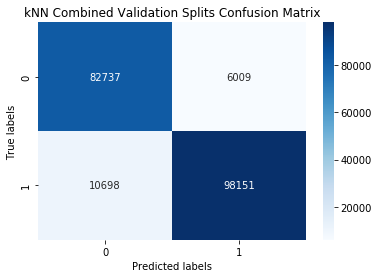

In [14]:
# Printing the combined result scores for the validation splits
print("Accuracy: " + "{:.2%}".format(np.mean(results)))
print("Recall: " + "{:.2%}".format(np.mean(recall)))
print("Precision: " + "{:.2%}".format(np.mean(precision)))
print("F1-Score: " + "{:.2%}".format(np.mean(f1)))

# Showing the combined confusion matrix for all validation splits
ax = plt.subplot()
sns.heatmap(kNN_cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('kNN Combined Validation Splits Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
plt.savefig('images/confusion/kNN Validation.png')
plt.show()
plt.close()


In [15]:
results = []
recall = []
precision = []
f1 = []

# Performing DT Analysis
kf_CV = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, validate_idx in kf_CV.split(train):
    X_train, X_val = train[predictors].iloc[train_idx], train[predictors].iloc[validate_idx]
    y_train, y_val = train[target].iloc[train_idx], train[target].iloc[validate_idx]

    # Performing DT analysis on the training dataset
    # 1. Training
    DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
    
    # 2. Predictions
    y_pred = DT.predict(X_val)
    results.append(accuracy_score(y_val, y_pred))
    recall.append(recall_score(y_val, y_pred))
    precision.append(precision_score(y_val, y_pred))
    f1.append(f1_score(y_val, y_pred))

    # Creating a confusion matrix
    if 'DT_cm' not in locals():
        DT_cm = confusion_matrix(y_val, y_pred, labels=DT.classes_)
    else:
        DT_cm += confusion_matrix(y_val, y_pred, labels=DT.classes_)

Accuracy: 92.39%
Recall: 92.72%
Precision: 93.42%
F1-Score: 93.07%


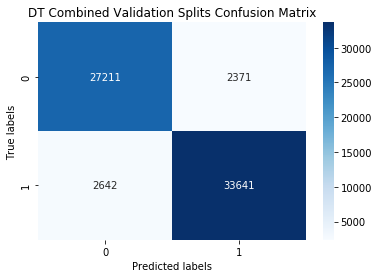

In [16]:
# Printing the combined result scores for the validation splits
print("Accuracy: " + "{:.2%}".format(np.mean(results)))
print("Recall: " + "{:.2%}".format(np.mean(recall)))
print("Precision: " + "{:.2%}".format(np.mean(precision)))
print("F1-Score: " + "{:.2%}".format(np.mean(f1)))

# Showing the combined confusion matrix for all validation splits
ax = plt.subplot()
sns.heatmap(DT_cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('DT Combined Validation Splits Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('images/confusion/DT Validation.png')
plt.show()
plt.close()

Accuracy: 92.57%
Recall: 92.88%
Precision: 93.56%
F1-Score: 93.22%


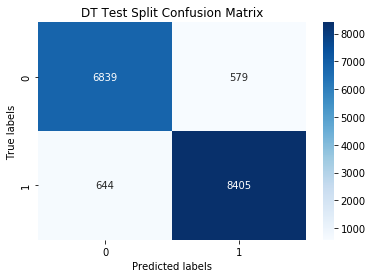

In [17]:
X_test = test[predictors]

# Printing the result scores for the training split
y_pred = DT.predict(X_test)
print("Accuracy: " + "{:.2%}".format(accuracy_score(y_test, y_pred)))
print("Recall: " + "{:.2%}".format(recall_score(y_test, y_pred)))
print("Precision: " + "{:.2%}".format(precision_score(y_test, y_pred)))
print("F1-Score: " + "{:.2%}".format(f1_score(y_test, y_pred)))

# Creating a confusion matrix for the test split
DT_cm = confusion_matrix(y_test, y_pred, labels=DT.classes_)

# Showing the confusion matrix for the test split 
ax = plt.subplot()
sns.heatmap(DT_cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('DT Test Split Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('images/confusion/DT Test.png')
plt.show()
plt.close()

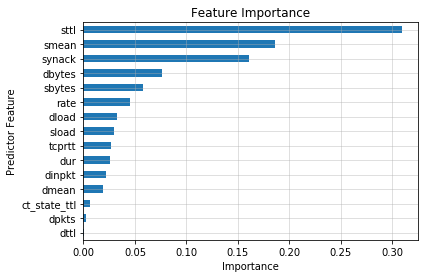

In [18]:
# Plotting the entropy values for each feature
importance = pd.Series(DT.feature_importances_, index=predictors)
importance = importance.groupby(level=0).mean()
importance.nlargest(len(predictors)).plot(kind='barh').invert_yaxis()
plt.grid(alpha=0.5)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Predictor Feature')
plt.savefig('images/importance.png')
plt.show()
plt.close()

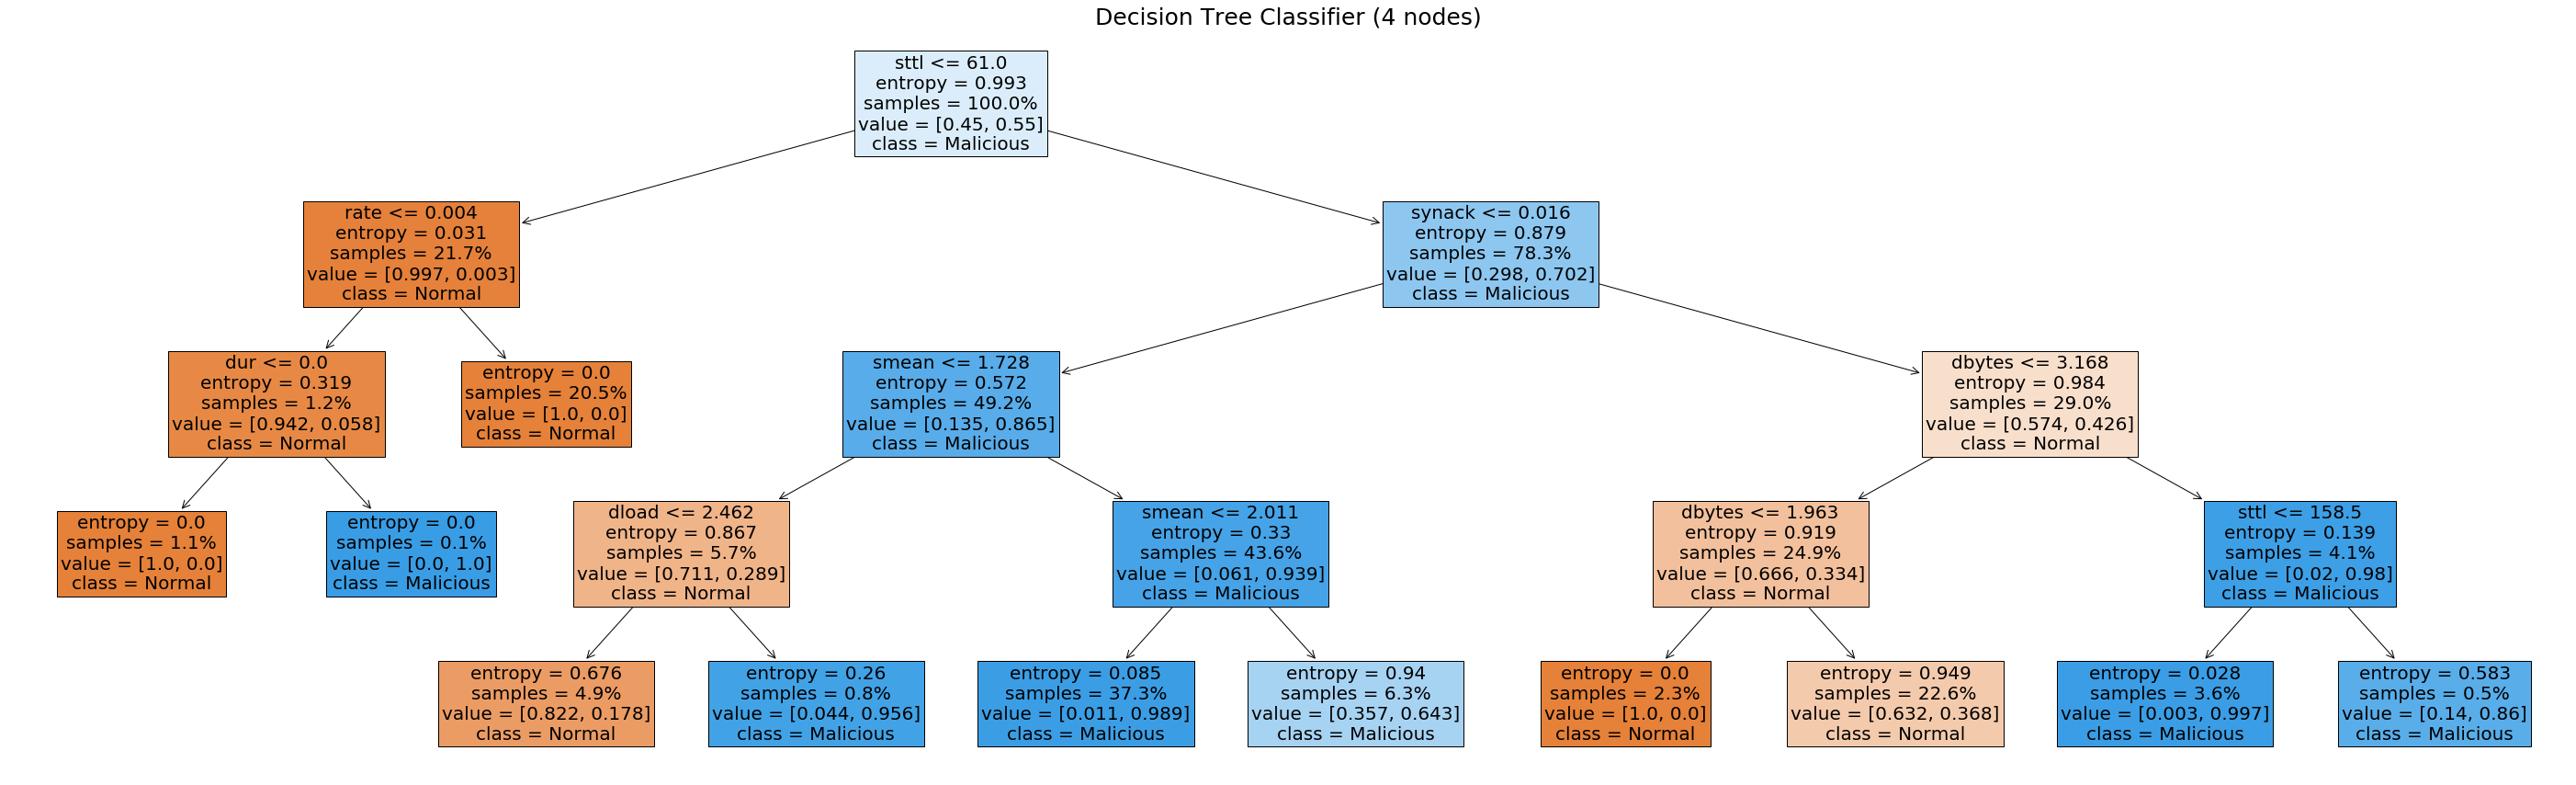

In [19]:
# Visualing the top 4 nodes of the decision tree
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(X_train, y_train.values.ravel())
fig = plt.figure(figsize=(50, 15))
plot_tree(DT, feature_names=predictors, filled=True, class_names=['Normal', 'Malicious'], proportion=True, fontsize=20)
plt.title("Decision Tree Classifier (4 nodes)", fontdict={'fontsize': 25})
plt.savefig('images/4 Node DT.png')
plt.show()
plt.close()

In [ ]:
# Export trained model and feature list for reuse
import os, json
import joblib

# Fit final Decision Tree on all data using selected predictors
X_full = df[predictors]
y_full = df['label']
DT_final = DecisionTreeClassifier(criterion='entropy').fit(X_full, y_full)

# Save artifacts
out_dir = os.path.join('..', '..', 'model', 'unsw_tabular')
os.makedirs(out_dir, exist_ok=True)
joblib.dump(DT_final, os.path.join(out_dir, 'model_dt.pkl'))
with open(os.path.join(out_dir, 'features.json'), 'w') as f:
    json.dump({'predictors': predictors}, f)

print(f"Saved model and features to: {out_dir}")